In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, DBSCAN, SpectralClustering, KMeans
from sklearn.manifold import SpectralEmbedding

In [2]:
coins_ = cv2.imread('NTDcoins.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
coins = cv2.resize(coins_, (int(coins_.shape[1]/10), int(coins_.shape[0]/10)))

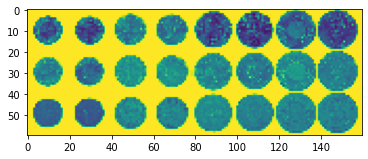

In [4]:
plt.imshow(coins)

In [5]:
coords = np.empty((*coins.shape[:2], 2))

In [6]:
for i in range(coords.shape[0]):
    for j in range(coords.shape[1]):
        coords[i, j][0] = i
        coords[i, j][1] = j

In [7]:
coins.shape

(60, 160)

In [8]:
coins_coords_ = np.concatenate([255-coins.reshape(*coins.shape, 1), coords], axis=-1)

In [9]:
coins_coords = coins_coords_.reshape(-1, coins_coords_.shape[-1])

In [10]:
# [y, x][v, y, x]
coins_coords

array([[  0.,   0.,   0.],
       [  0.,   0.,   1.],
       [  0.,   0.,   2.],
       ...,
       [  0.,  59., 157.],
       [  0.,  59., 158.],
       [  0.,  59., 159.]])

In [11]:
bg_classes = DBSCAN(eps=10).fit_predict(coins_coords)

In [12]:
cls_, cls_cnts_ = np.unique(bg_classes, return_counts=True)
target_cls = cls_[np.argsort(cls_cnts_)[-2:]]
bg_classes[bg_classes != target_cls[0]] = -1

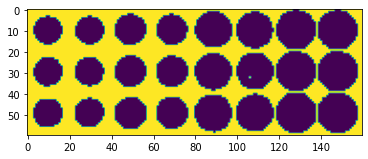

In [13]:
bg_classes = bg_classes.reshape(coins.shape[:2])
plt.imshow(bg_classes)

In [14]:
coins_points = np.array(np.where(bg_classes != bg_classes[0, 0])).T

In [15]:
dbscan = DBSCAN(eps=1)
coins_classes = dbscan.fit_predict(coins_points)

In [16]:
max(coins_classes)

23

In [17]:
cm = (coins_classes+1)/(max(coins_classes)+1)

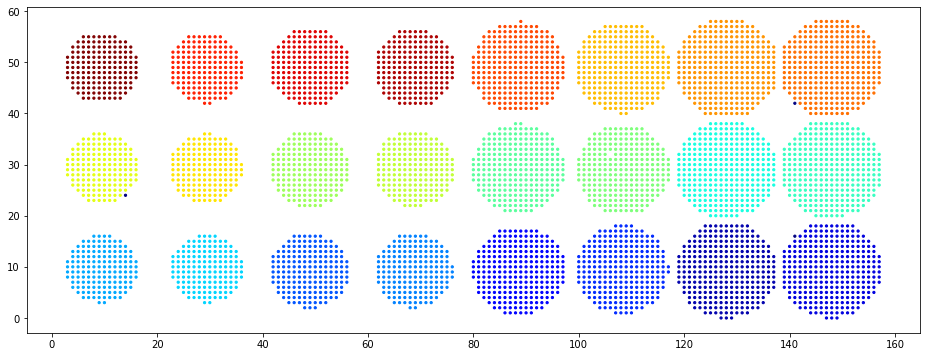

In [18]:
plt.figure(figsize=(16, 6))
plt.scatter(coins_points[:,1], coins_points[:,0], s=5, c=plt.cm.jet(cm))

In [19]:
cls_, cls_cnts_ = np.unique(coins_classes, return_counts=True)

In [20]:
#type_cm = KMeans(n_clusters=3+1).fit_predict(cls_cnts_.reshape(-1,1))
type_ = DBSCAN(eps=10).fit_predict(cls_cnts_.reshape(-1,1))
type_cm = (type_ + 1) / (max(type_) + 1)

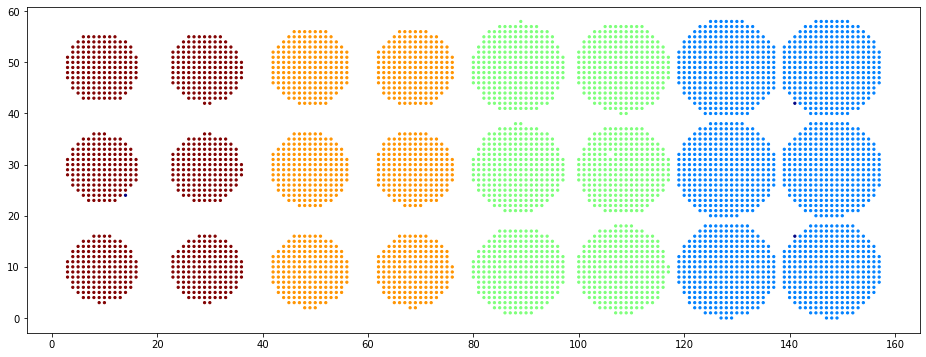

In [21]:
plt.figure(figsize=(16, 6))
plt.scatter(coins_points[:,1], coins_points[:,0], s=5, c=plt.cm.jet(type_cm[coins_classes+1]))

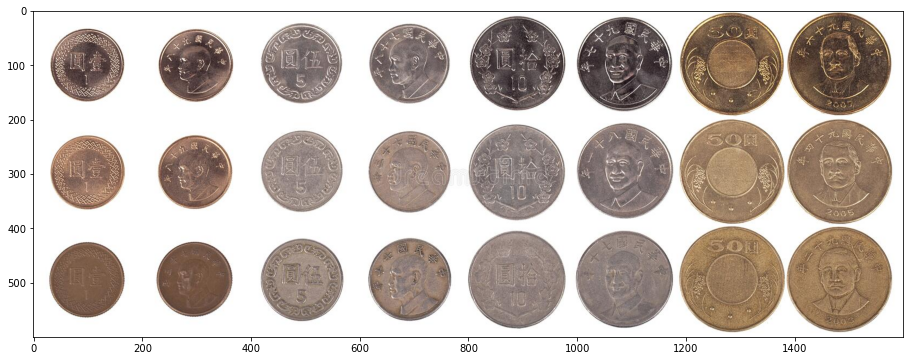

In [22]:
plt.figure(figsize=(16, 6))
plt.imshow(cv2.imread('NTDcoins.jpg')[:,:,::-1])